# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `24`
* Students: `Marc Glettig, Matthias Minder, Yves Rychener, Charles Trotin`
* Dataset: `Wikipedia Dataset`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
# first, some imports
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
DATA_FOLDER = 'data/'

Text(0.5,1.05,'Adjacency matrix')

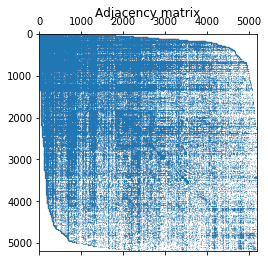

In [3]:
adjacency =  np.load(DATA_FOLDER + 'sym_adj_matrix_lc.npy')
n_nodes =  adjacency.shape[0]
n_edges =  adjacency.sum()/2
plt.spy(adjacency, markersize=.05)
plt.title('Adjacency matrix')

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**
<br> Note that we moved the imports to the top.

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [4]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    # set random seed
    random.seed(seed)    
    
    # create the nodes without edges
    adjacency = np.zeros((n,n))
    
    # add random edges
    for i in range(n):
        for j in range(i+1,n):
            if(random.random()<=p):
                adjacency[i,j] = 1
                adjacency[j,i] = 1
    
    return adjacency

In [5]:
# test the observed vs inputted probability to detect errors in coding
n = 100
psum = 0
for i in range(1000):
    er = erdos_renyi(n, 0.4)
    psum += er.sum()/(n*n-n)
print('Average probability: '+str(round(psum/1000,5)))

Average probability: 0.40012


The probability test does not raise an error, the function seems ok.

Text(0.5,1.05,'Erdos-Renyi (5, 0.6)')

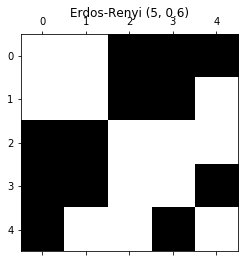

In [6]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5,1.05,'Erdos-Renyi (10, 0.4)')

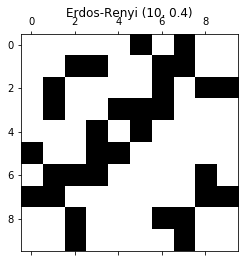

In [7]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

Text(0.5,1.05,'Random Adjacency Matrix')

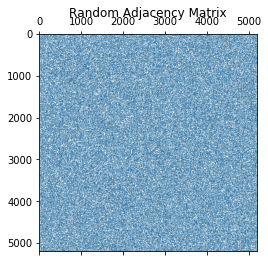

In [8]:
# calculate the edge probability
p = adjacency.sum()/(n_nodes*n_nodes-n_nodes)
random_adj = erdos_renyi(n_nodes, p, seed = 1000)

plt.spy(random_adj, markersize=0.02)
plt.title('Random Adjacency Matrix')

The edge probability is calculated as $p=\frac{n_{links}}{n_{possibleLinks}} = \frac{n_{linksAdjMatrix}}{n_{nodes}^2-n_{nodes}}$ since in the second fraction we count all links twice, but also all possible links twice. Note that for edge probability calculation, we have to exclude the diagonal axis, since we do not allow self-links.

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [9]:
def norm_degree_distribution(adj, norm=True):
    """Computes the (normalized) degree distribution for every node of an undirected graph
    Params:
      adj: adjacency matrix
      norm: Bool, specifies whether or not to normalize the result
    
    Returns:
      a vector with degree for each node
    """
    
    tmp = np.matmul(adj,np.ones((adj.shape[1],1)))
    if(norm): 
        return tmp.flatten() / tmp.sum()
    else: 
        return tmp.flatten()
    


def barabasi_albert(n, m, seed=None, m0=2):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    m0: int
        
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    # Seed, check input
    np.random.seed(seed)
    assert n >= m, "Arguments have to satisfy n >= m"
    assert m > 0, "m has to be greater than 0"
    assert m0 >= m, "m0 has to be greater or equal to m"
    
    # Create initial graph, by linking every node to a random other node
    # Initial graph size: max(2, m) to avoid starting with only 1 node
    adjacency = np.zeros((n, n))
    for i in range(m0-1):
        j = np.random.randint(i+1, m0)
        adjacency[i, j] = 1
        adjacency[j, i] = 1
        
    # Growing with preferential attachment
    for n_nodes in range(m0, n):
        deg_distr = norm_degree_distribution(adjacency)
        attachments = np.random.choice(n_nodes, m, replace = False, p = deg_distr[:n_nodes])
        adjacency[n_nodes, attachments] = 1
        adjacency[attachments, n_nodes] = 1
    return adjacency

Text(0.5,1.05,'Barabasi-Albert (5, 1)')

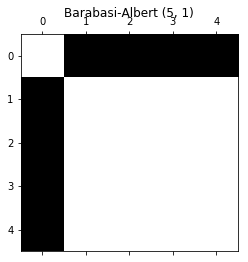

In [10]:
ba = barabasi_albert(5, 1, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5,1.05,'Barabasi-Albert (10, 2)')

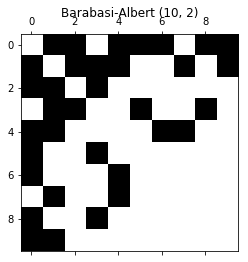

In [11]:
ba = barabasi_albert(10, 2, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [13]:
our_m = int(1/4*(n_nodes + 2 - np.sqrt((n_nodes + 2)**2 - 4 * 2*n_edges)))
print(our_m)
our_ba = barabasi_albert(n_nodes, our_m, 42, 2*our_m)

32


*As seen in class, a Barabasi-Albert model has after $t$ steps $N = t + m_0$ nodes and $E = mt + m_0$ links. By taking $m_0 = 2m$ as we did in our implementation, we obtain a system of equations which we can solve for $m$. We obtain two solutions:*<br><br>

$$m = \frac{1}{4} \left( N + 2 \pm \sqrt{(N + 2)^2 - 8E}\right)$$<br>

*We take the smaller solution, because this leads to a larger $t$ and thus more steps at which preferential attachment occurs. This way, the final network depends less on the (arbitrary) initial network of size $m_0$.*

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [14]:
n_edges_random =  random_adj.sum()/2
n_edges_ba = our_ba.sum()/2
print("Original: " + str(n_edges) + "\nErdös-Rényi: " + str(n_edges_random) + "\nBarabási-Albert: " + str(n_edges_ba))


Original: 168672.0
Erdös-Rényi: 168830.0
Barabási-Albert: 164223.0


*Up to numerical imprecisions due to rounding of parameters (since the parameters have to be integers), the number of edges in all three graphs are equal by design of the Erdős–Rényi and Barabási-Albert model.*

### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [37]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    #removing q=0 because Q(i) = 0 implies P(i) = 0 (absolute continuity)
    indices=[i for i in range(0,len(q)) if (q[i]!=0 and p[i]!=0)] 
    
    kl=sum(p[indices]*np.log(p[indices]/q[indices]))
    return kl

In [38]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

In [45]:
def prob_degree_distribution(adj):
    """Computes the probability distribution of degrees in a network determined by its 
    adjacency matrix.
    
    Parameters
    adj:
        Adjacency Matrix
    
    Returns
        The vector of the probability distribution of degrees
        Entry of index i corresponds to the probability of having degree i+1 
    """
    degree = norm_degree_distribution(adj, norm=False)
    max_deg = int(degree.max())
    deg_count = np.zeros(max_deg)

    for i in range(max_deg):
        deg_count[i] = np.sum(degree == i+1)
    return deg_count / n_nodes



In [46]:
prob_dist = prob_degree_distribution(adjacency)
prob_dist_random = prob_degree_distribution(random_adj)
prob_dist_ba = prob_degree_distribution(our_ba)

print("Original & Erdös-Rényi: "+ str(kl_divergence(prob_dist, prob_dist_random)))
print("Original & Barabàsi-Alberts: "+ str(kl_divergence(prob_dist, prob_dist_ba)))

Original & Erdös-Rényi: 0.11232515056461487
Original & Barabàsi-Alberts: 0.1367258065580508


### Question 8

Plot the degree distribution histograms for all three networks. Are they consistent with the KL divergence results? Explain.

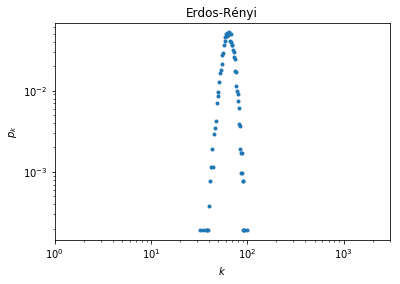

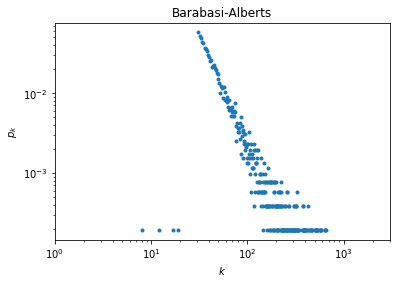

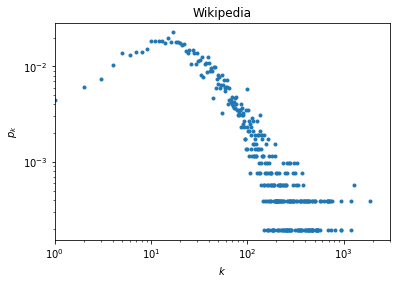

In [47]:
# Plots loglog scatter plot
def plot_loglog(adj, title="", xlim = None):
    deg_count = prob_degree_distribution(adj)

    plt.loglog(deg_count,'.')
    plt.xlabel("$k$")
    plt.ylabel("$p_k$")
    plt.title(title)
    if xlim:
        plt.xlim(left = xlim[0], right = xlim[1])
    plt.show()

plot_loglog(random_adj, "Erdos-Rényi", xlim = [1,3*10**3])
plot_loglog(our_ba, "Barabasi-Alberts", xlim = [1,3*10**3])
plot_loglog(adjacency, "Wikipedia", xlim = [1,3*10**3])

*From the loglog plots, we observe that the degree probability distribution of the Wikipedia network corresponds better to the Barabasi-Alberts model, especially in its upper tail. This observation is confirmed by the KL-divergence, which is higher between the Wikipedia and the Barabasi-Alberts model than with the Erdös-Rényi model.*

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

*Equal degree distribution does not imply the same graph, since the information between which nodes the edges are created is lost. For a trivial counter-example, consider three undirected graphs, each consisting of three points, labeled 1 to 3. Graph 1 has a connection between node 1 and 2, graph 2 has a connection between 2 and 3, and graph 3 has a connection between node 1 and 3. All three graphs have equal degree distribution, but are different distinct graphs.*

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Your answer here.**

### Question 11

Explain (in short) how the chosen model works.

**Your answer here.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [ ]:
# Your code here.

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [ ]:
# Your code here.

Are the results what you expected? Explain.

**Your answer here.**